<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_2_Lab2_Submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 2 & Submit**

## **Preprocessing**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### **Step 1: Import the boston house dataset from `sklearn.datasets`.**


In [49]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv(url, delim_whitespace=True, names=names)

- **Create train and test datasets.**

In [50]:
X=boston.drop('MEDV',axis=1).values
y=boston['MEDV'].values

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.values[:,:-1], boston.values[:,-1], test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (404, 13)
Testing data shape: (102, 13)





- **Check the data description and familiarize yourself with the data.**

In [52]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [53]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### **Step 2: Create a scatter plot of each attribute with the mean house price.**


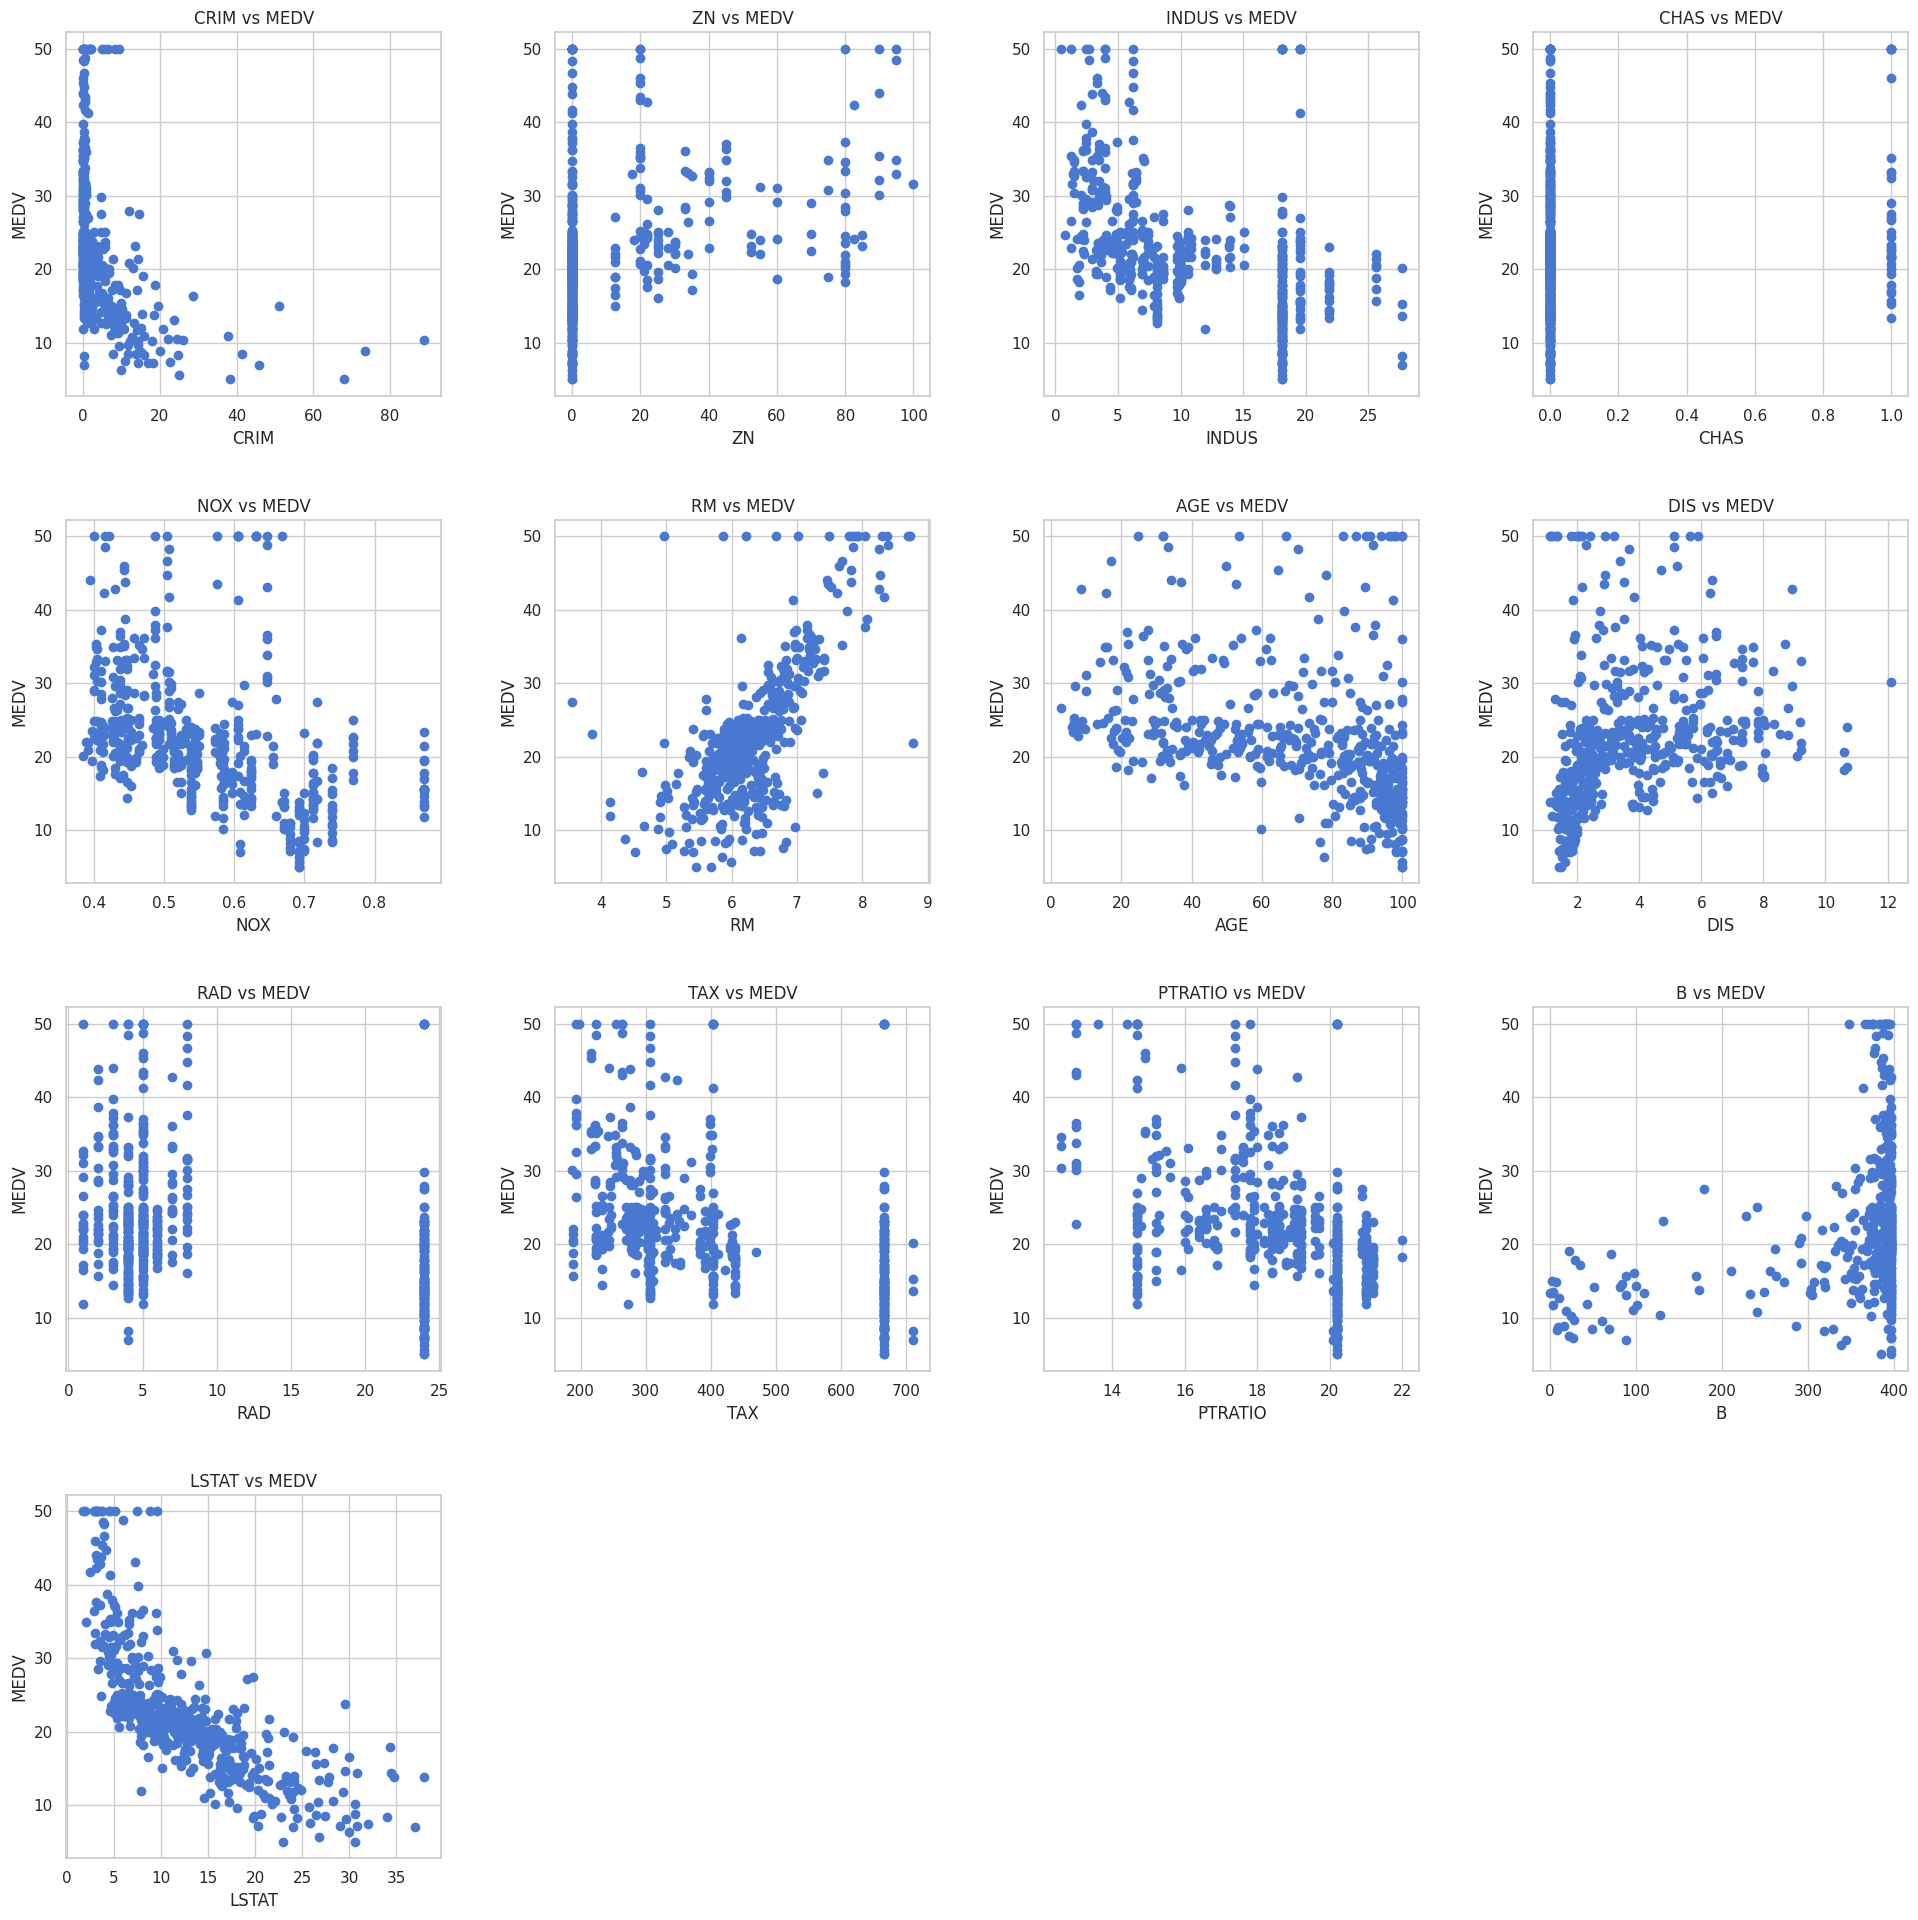

In [54]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    column = boston.columns[i]
    ax.scatter(boston[column], boston['MEDV'])
    ax.set_title(f'{column} vs MEDV')
    ax.set_xlabel(column)
    ax.set_ylabel('MEDV')

plt.tight_layout(pad=3)
plt.show()

### **Step 3: Create a box plot of all attributes.**

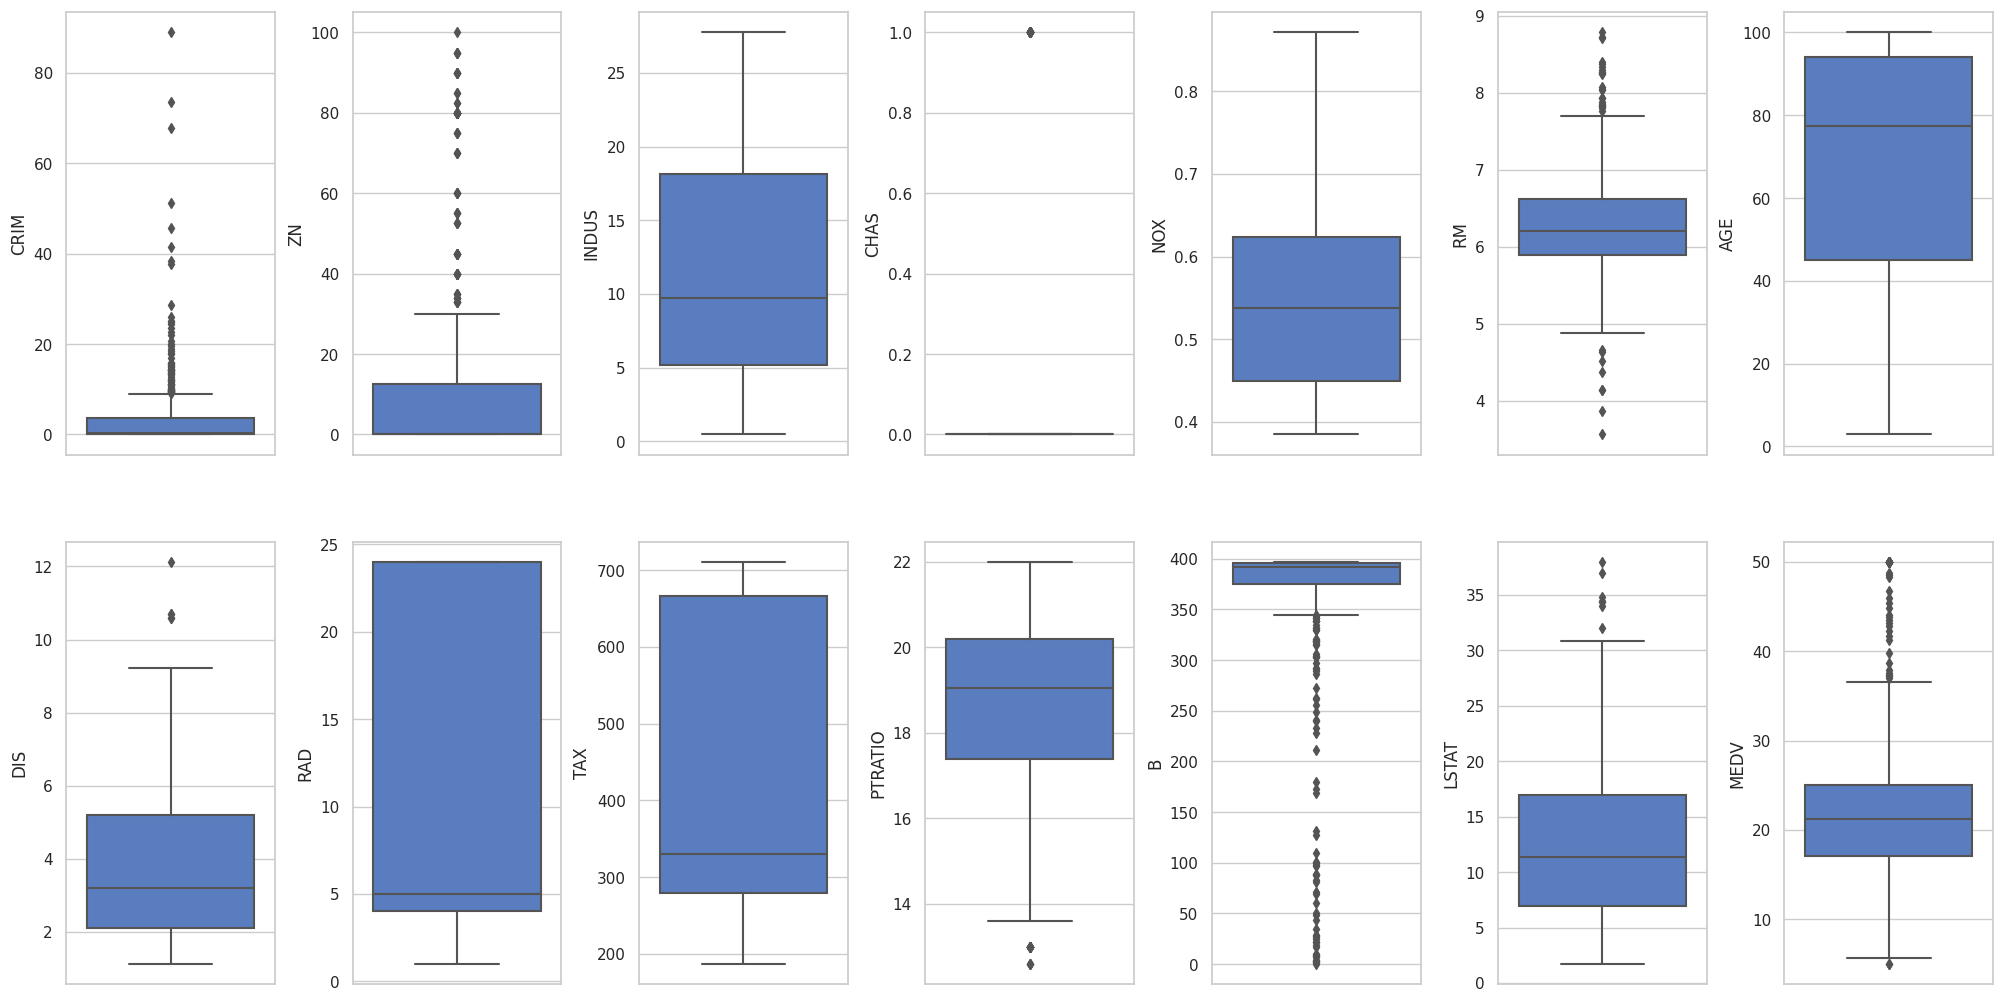

In [55]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in boston.items():
    sns.boxplot(y=col, data=boston, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

### Step 4:
Use `StandardScaler()` to scale the trainin data set.

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


### Step 5:
Use `KNeighborsRegressor()` to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models.

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"Not-scaled model R^2 score: {score:.3f}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_scaled = KNeighborsRegressor(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
score_scaled = r2_score(y_test, y_pred_scaled)
print(f"Scaled model R^2 score: {score_scaled:.3f}")


Not-scaled model R^2 score: 0.647
Scaled model R^2 score: 0.719


### Step 6:
Repeat Step 5 for `RandomForestRegressor`. Use

`RandomForestRegressor(n_estimators=100, random_state=0)`

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_unscaled = RandomForestRegressor(n_estimators=100, random_state=0)
rf_unscaled.fit(X_train, y_train)
score_unscaled = rf_unscaled.score(X_test, y_test)

rf_scaled = RandomForestRegressor(n_estimators=100, random_state=0)
rf_scaled.fit(X_train_scaled, y_train)
score_scaled = rf_scaled.score(X_test_scaled, y_test)

print(f"Unscaled score: {score_unscaled:.3f}")
print(f"Scaled score: {score_scaled:.3f}")

Unscaled score: 0.873
Scaled score: 0.873
